In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Years-Months,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.dtypes

Years-Months    object
Passengers       int64
dtype: object

In [5]:
# Now We are prvideing inputs to tell pandas that we are trying to work with time series
df=pd.read_csv('AirPassengers.csv',parse_dates=['Years-Months'])

In [6]:
df.head()

,Years-Months,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df.dtypes

Years-Months    datetime64[ns]
Passengers               int64
dtype: object

# It is recommended that we make out time series reference as the index

In [8]:
df=pd.read_csv('AirPassengers.csv',parse_dates=['Years-Months'],index_col='Years-Months')

In [9]:
df.head()

,Passengers
Years-Months,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.dtypes

Passengers    int64
dtype: object

# Now CHeck Specific time period

In [11]:
df['1949-01-01':'1950-01-01']

,Passengers
Years-Months,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


# Now Plot the data for time series

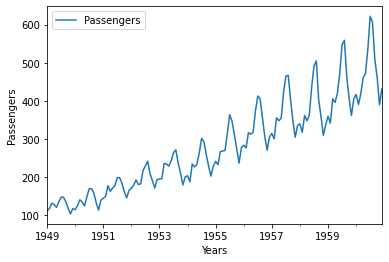

In [12]:
df.plot()
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.show()

This Plot show trend also show seasonality but Seasonality no constant its show upword trend for the time to time.

Now Seasonality no constant then we use mutliplicative model.


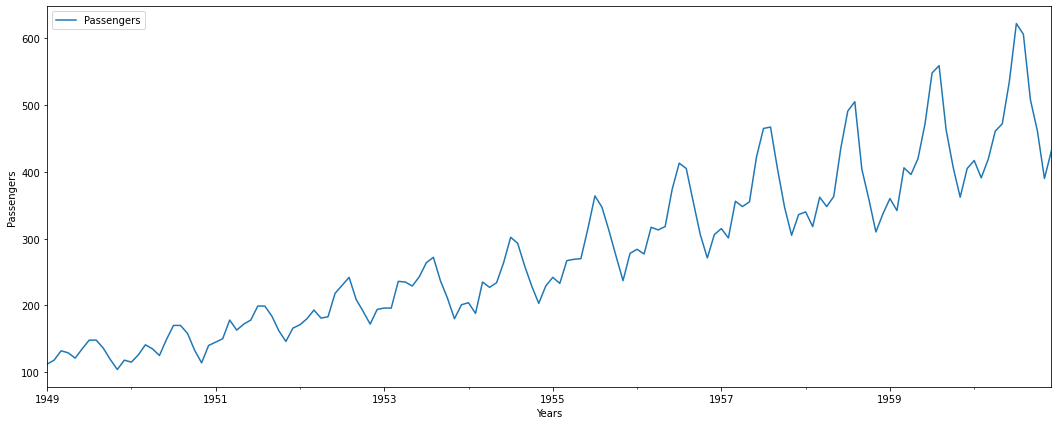

In [13]:
df.plot(figsize=(18,7))
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.show()

This trend show upword trend.

# Now Decompose the time series multiplicatively and also import lib

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

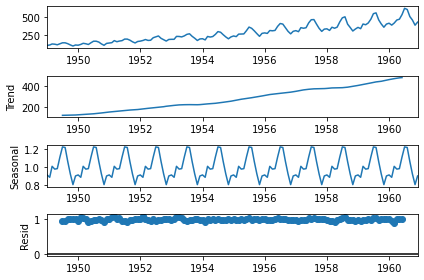

In [15]:
df_mul_decompose=seasonal_decompose(df,model='multiplicative')

df_mul_decompose.plot()
plt.show()

# Now We convert multiplicative model to additive model 
# its simply to convert only the help of log then this model is convert to additive model

In [16]:
# Let's try to do log transformation 
# I also copy the data on df1_log
df_log=df.copy()

In [17]:
df_log['Pas']=np.log(df)

In [18]:
df_log.head()

,Passengers,Pas
Years-Months,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


In [19]:
df_log.Pas

Years-Months
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pas, Length: 144, dtype: float64

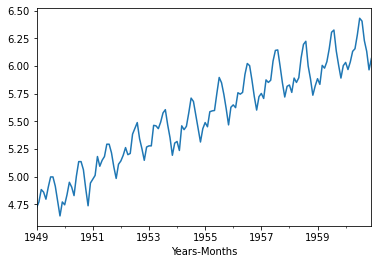

In [20]:
# Now Visualize the log transformed Series
df_log['Pas'].plot()
plt.show()

# Now Compare with the original series to log series

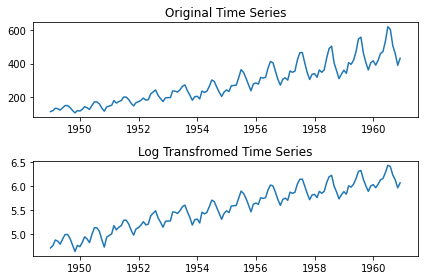

In [21]:
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transfromed Time Series')
plt.plot(df_log['Pas'])

plt.tight_layout()
